In [1]:
#Predicting the survival of the titanic passengers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc

import statsmodels.api as sm #statical modeling
from sklearn.model_selection import train_test_split

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns

In [3]:
#importin gthe dataset
df=pd.read_csv(r"C:\Users\HP\Python-Class-Advanced\Assignment10\titanic.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
#describing the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Display the shape of the dataset
df.shape

(891, 12)

In [6]:
#display the information regarding the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#display the count of nulls
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# drop missing values 
df = df.dropna() 
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
#Dropping the missing values
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Text(0.5, 1.0, 'Survivors in Titanic Ship')

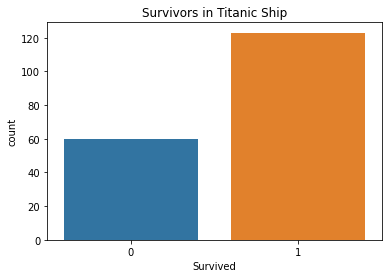

In [11]:
#Create a sns countplot of survived column
#For sns countplot you have to import seaborn
#import seaborn as sns
survived_count=pd.DataFrame(df)
survived_count=sns.countplot(x="Survived", data =df)

#Add appropriate chart title
survived_count.set_title("Survivors in Titanic Ship")

<AxesSubplot:xlabel='Survived', ylabel='count'>

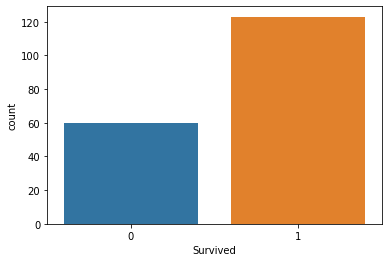

In [12]:
#Alternatively you can write code as below to obtain the countplot
#Create a sns counplot of the Survived column
sns.countplot(x=df.Survived)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

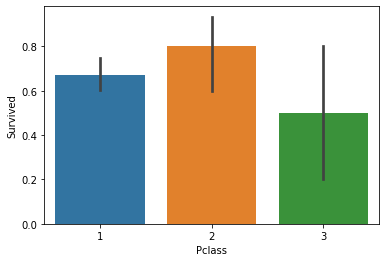

In [13]:
#Obtain barplot for the PClass and the Survived
sns.barplot (x=df.Pclass, y=df.Survived)

In [14]:
#Show the age field
df["Age"]

1      38.0
3      35.0
6      54.0
10      4.0
11     58.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 183, dtype: float64

In [15]:
#Describe the age column
df["Age"].describe()

count    183.000000
mean      35.674426
std       15.643866
min        0.920000
25%       24.000000
50%       36.000000
75%       47.500000
max       80.000000
Name: Age, dtype: float64

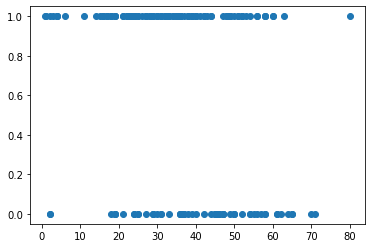

In [16]:
#create a scatter plot for age and survived
plt.scatter (x=df.Age, y=df.Survived)

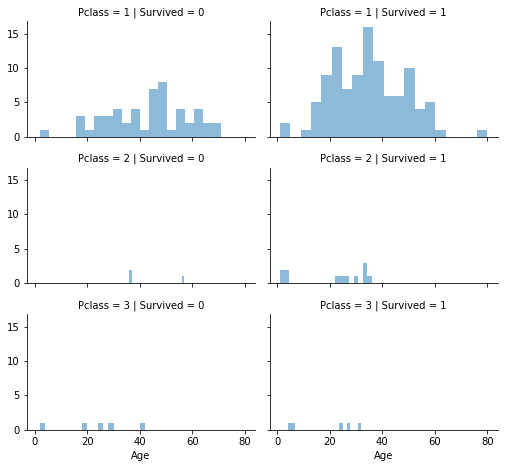

In [17]:
#Create a scatterplot for age and survived by age and by Pclass
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [18]:
#Feature Recode: Male = 1, Female = 2 for regression analysis
dict={}
dict={"male":'1', "female":'2'}
print(dict)

{'male': '1', 'female': '2'}


In [20]:

df['SexNum']= df['Sex'].map(dict) 
df['SexNum'] =  df['SexNum'].astype('int') 

In [21]:
# Feature Selection
features = df[['Pclass','SexNum', 'Age','SibSp']]
target = df.Survived
features.corr()

,Pclass,SexNum,Age,SibSp
Pclass,1.000000,0.046181,-0.306514,-0.103592
SexNum,0.046181,1.000000,-0.184969,0.104291
Age,-0.306514,-0.184969,1.000000,-0.156162
SibSp,-0.103592,0.104291,-0.156162,1.000000


In [61]:
#split the data into X and y
#You will be required to import the following Python libraries
#from sklearn.linear_model import LogisticRegression
#from sklearn import preprocessing
#from sklearn.metrics import roc_curve, auc

#import statsmodels.api as sm #statical modeling
#from sklearn.model_selection import train_test_split


In [22]:
#split the data into X and y

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=1)

In [25]:
#formula = 'Survived ~ C(Pclass) + SexNum + Age + SipSp'
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SipSp'
formula

'Survived ~ C(Pclass) + C(Sex) + Age + SipSp'

In [26]:
#Display summary of the model
logitfit = sm.Logit(y_train, x_train, formula = str(formula)).fit()
#if you want a thorough explanation of the summary = https://stats.idre.ucla.edu/stata/output/logistic-regression-analysis/
logitfit.summary()

Optimization terminated successfully.
         Current function value: 0.408587
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  137
Model:                          Logit   Df Residuals:                      133
Method:                           MLE   Df Model:                            3
Date:                Fri, 12 Nov 2021   Pseudo R-squ.:                  0.3546
Time:                        14:38:39   Log-Likelihood:                -55.976
converged:                       True   LL-Null:                       -86.733
Covariance Type:            nonrobust   LLR p-value:                 2.792e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.3744      0.453     -3.032      0.002      -2.263      -0.486
SexNum         3.4073      0.652      5.223      0.000       2.129       4.686
Age           -0.0520      0.012     -4.295      0.000      -0.076      -0.028
SibSp         -0.1800      0.377     -0.477      0.633      -0.919       0.559
==============================================================================
"""

In [27]:
#11: Calculate the y predicted values with your logistic model
#12: Round y_pred and save the values in y_pred.
#13: Calculate the model residuals
# apply model to test data & calculate residuals
y_pred = np.round(logitfit.predict(x_test))
residuals = y_test - y_pred
residuals

297   -1.0
456    0.0
581    0.0
871    0.0
268    0.0
789    0.0
193    0.0
867   -1.0
730    0.0
585    0.0
97     0.0
540    0.0
625    0.0
66     0.0
390    1.0
11     0.0
473    0.0
92     0.0
177   -1.0
118   -1.0
462    0.0
558    0.0
609    0.0
453    1.0
269    0.0
781    0.0
429    1.0
307    0.0
251   -1.0
765    0.0
583   -1.0
209    1.0
245    0.0
311    0.0
102   -1.0
21     1.0
516    0.0
632    0.0
700    0.0
772   -1.0
712    1.0
591    0.0
299    0.0
310    0.0
796    0.0
536    0.0
dtype: float64

In [28]:
#Calculate the model residuals
print('Mean of residuals =', np.mean(residuals))

Mean of residuals = -0.043478260869565216


In [29]:
#Find the confusion matrix
cm = pd.crosstab(y_test,y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 col_0     0.0  1.0
Survived          
0           7    8
1           6   25


<AxesSubplot:xlabel='col_0', ylabel='Survived'>

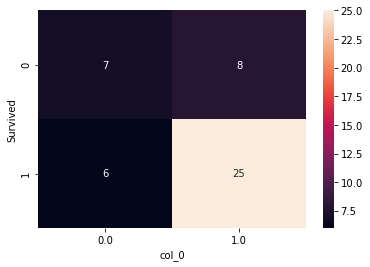



True Negative = 7
True Positive = 25
False Negative = 8
False Positive = 6


In [30]:
#display the heatmap
sns.heatmap(cm, annot=True)
plt.show()

TN = cm[0][0]   
TP = cm[1][1]

FN = cm[1][0]
FP = cm[0][1]

#Print the value for TN, TP, FN, and FP
print('\n\nTrue Negative =', TN)
print('True Positive =', TP)
print('False Negative =', FN)
print('False Positive =', FP)

In [33]:
Print the accuracy score using the formula accuracy_score(y_test,y_pred)

print('\n\nAccuracy =', round((TP + TN)/ (TP +TN + FN + FP),2))
#accuracy_score(y_test,y_pred)

SyntaxError: invalid syntax (<ipython-input-33-5746b08bfa6b>, line 1)

(0.0, 1.0)

(0.0, 1.0)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic example')

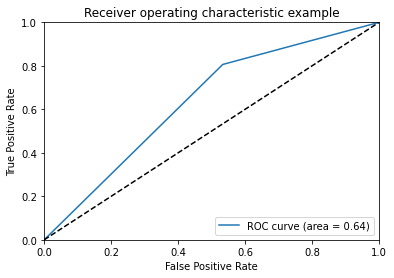

In [34]:
# Plot ROC curve  ===> Receiver Operating Characteristic Curve (ROC)
plt.clf()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Distribution of our Predictions')

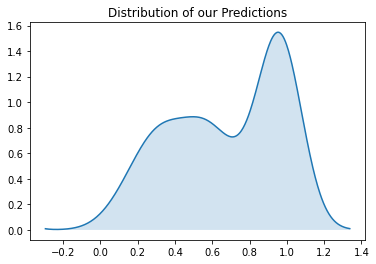

In [35]:
#Let's see the prediction distribution based on the male gender: Male = 1, Female = 2 for regression

kde_res = sm.nonparametric.KDEUnivariate(logitfit.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=0.2)
plt.title("Distribution of our Predictions")

Text(0.5, 0, 'Predicted chance of survival')

Text(0, 0.5, 'Male Gender')

Text(0.5, 1.0, 'The Change of Survival Probability by Gender being Male')

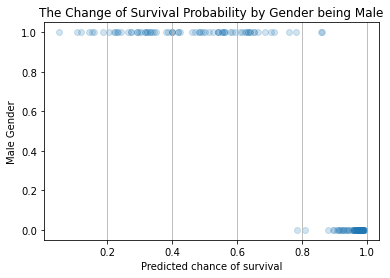

In [36]:
#  Let's see the prediction distribution based on the male gender: Male = 1, Female = 2 for regression
male = x_train.SexNum==1
plt.scatter(logitfit.predict(),male , alpha=0.2)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted chance of survival")
plt.ylabel("Male Gender")
plt.title("The Change of Survival Probability by Gender being Male")

Text(0.5, 1.0, 'The Change of Survival Probability by Age')

Text(0.5, 0, 'Predicted chance of survival')

Text(0, 0.5, 'age')

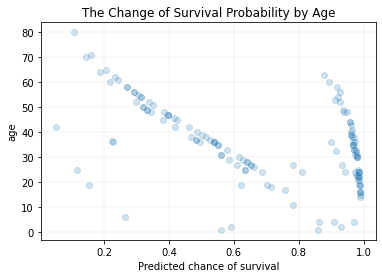

In [37]:
plt.scatter(logitfit.predict(),x_train.Age , alpha=0.2)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Age")
plt.xlabel("Predicted chance of survival")
plt.ylabel("age")